Iteration number 0 cost value:  2.4636778095255303


89.9402390438247

Iteration number 100 cost value:  1.1081252284464227


38.44621513944223

Iteration number 200 cost value:  0.31610415940080605


11.852589641434262

Iteration number 300 cost value:  0.16218024936460562


9.163346613545817

Iteration number 400 cost value:  0.08255223991042394


7.569721115537849

Iteration number 500 cost value:  0.06953000848998475


7.370517928286852

Iteration number 600 cost value:  0.05888602368232558


7.171314741035856

Iteration number 700 cost value:  0.04992490956185565


7.270916334661354

Iteration number 800 cost value:  0.042428344622838725


7.270916334661354

Iteration number 900 cost value:  0.036217772870065376


7.370517928286852

Iteration number 1000 cost value:  0.031118713292752506


7.370517928286852

Iteration number 1100 cost value:  0.026939136931412224


7.370517928286852

Iteration number 1200 cost value:  0.02349451325649948


7.47011952191235

Iteration number 1300 cost value:  0.020639823221961853


7.0717131474103585

Iteration number 1400 cost value:  0.01826411088153425


6.872509960159363

Iteration number 1500 cost value:  0.016271979788805208


6.972111553784861

Iteration number 1600 cost value:  0.014582770688589033


6.772908366533865

Iteration number 1700 cost value:  0.013135850171923692


6.772908366533865

Iteration number 1800 cost value:  0.011892814426986255


6.772908366533865

Iteration number 1900 cost value:  0.010826145566200778


6.872509960159363

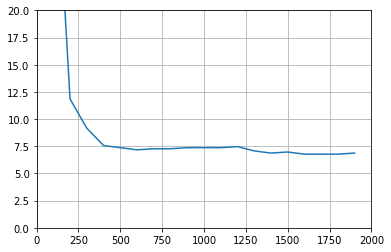

In [2]:
import numpy as np
X = []  
m = 6006
with open('mnist_small_train_in.txt') as f:
    for item in f:
            X.append([int(i) for i in item.split(",")])
X=np.array(X)

y =[] 
    #display(X.shape)
with open('mnist_small_train_out.txt') as f:
    for item in f:
        y.append([int(i) for i in item.split()])
y=np.array(y)

X_t = []  
with open('mnist_small_test_in.txt') as f:
    for item in f:
            X_t.append([int(i) for i in item.split(",")])
X_t=np.array(X_t)

y_t =[] 

with open('mnist_small_test_out.txt') as f:
    for item in f:
        y_t.append([int(i) for i in item.split()])
y_t=np.array(y_t)



digits = 10


n_train_samples = y.shape[0]  ## reshape output of training data into  10 rows and 6606 column in one hot encoding format 
y = y.reshape(1, n_train_samples) # 1 row 6606 colm
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, n_train_samples)  # 10 rows and 6606 column


n_test_samples = y_t.shape[0]  ## reshape testing data
y_t = y_t.reshape(1, n_test_samples)  
Y_t_new = np.eye(digits)[y_t.astype('int32')]
Y_t_new = Y_t_new.T.reshape(digits, n_test_samples)





X_train, X_test = X.T, X_t.T
Y_train, Y_test = Y_new, Y_t_new


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L


import matplotlib.pyplot as plt
n_x = X_train.shape[0]
n_h1 = 128
n_h2 = 128
learning_rate = 4

W1 = np.random.randn(n_h1, n_x)* np.sqrt(1. / n_x)  ## shrinked variance of each layer by diving by square root of number of nodes in that layer
b1 = np.zeros((n_h1, 1))* np.sqrt(1. / n_x)
W2 = np.random.randn(n_h2, n_h1)* np.sqrt(1. / n_h1)
b2 = np.zeros((n_h2, 1))* np.sqrt(1. / n_h1)
W3 = np.random.randn(digits, n_h2)* np.sqrt(1. / n_h2)
b3 = np.zeros((digits, 1))* np.sqrt(1. / n_h2)

X = X_train
Y = Y_train

plotting=[]



for i in range(2000):
    
    if(i>400):
        learning_rate=1.08  # decreasing LR later
    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.matmul(W3,A2) + b3
    A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=0)  ## softmax at last layer as it sums all prob to 1
    #display(A2)
    

    cost = loss(Y, A3)  # calculating the loss
    
    
    #####back propagation begin############
    dZ3 = A3-Y  # observed minus expected
    dW3 = (1./m) * np.matmul(dZ3, A2.T)  # derivative w.r.t. weights
    db3 = (1./m) * np.sum(dZ3, axis=1, keepdims=True) # derivative w.r.t. bias
    
    dA2 = np.matmul(W3.T, dZ3)
    dZ2 = dA2 * sigmoid(Z2) * (1 - sigmoid(Z2))
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
   

    W3 = W3 - learning_rate * dW3  # positive gradient tells to travel down to reach minima
    b3 = b3 - learning_rate * db3
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    #####back propagation end ############
    
    #### testing the performace on testing data set####
    if (i % 100 == 0):
        print("Iteration number", i, "cost value: ", cost)
       
        Z1 = np.matmul(W1,X_test) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2,A1) + b2
        A2 = sigmoid(Z2)
        Z3 = np.matmul(W3,A2) + b3
        A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=0)  ## softmax at last layer
        predictions = np.argmax(A3, axis=0) # index with max value is our prediction
        labels = np.argmax(Y_test, axis=0) # true labels of test data
        
        k=(np.count_nonzero(predictions-labels))  # number of mismatches 
        k=(k*100)/1004  # percentage of wrong answers
        display(k)
        plotting.append(k)
                
        
axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([0,20])
t = np.arange(0, 2000, 100)
plt.plot(t,plotting)
plt.grid(True)   


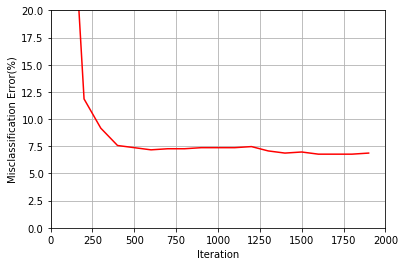

In [11]:
axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([0,20])
t = np.arange(0, 2000, 100)
plt.plot(t,plotting,c='r')
plt.xlabel('Iteration')
plt.ylabel('Misclassification Error(%)')
plt.grid(True) 